 # Linear Regression

## Las matemáticas detrás de una regresión lineal

Con lo que vamos a trabajar es con el precio de pisos según la superficie. En este sentido, tenemos la siguiente tabla de valores a predecir:

| Superficie (m2) | Alquiler Mensual (€) |
|-----------------|----------------------|
| 150             | 450                  |
| 120             | 380                  |
| 170             | 480                  |
| 80              | 270                  |

Considerando esta tabla, la intención es en base a una variable observada (x -> Superficie), predecir una variable objetivo (y -> alquiler mensual).

Para el caso de la regresión, asumimos que el coste es una función lineal sobre el coste. Entonces, el modelo, desde un punto de vista matemático, se construye en base a la siguiente ecuación:

$$
 y_e = \alpha + \beta * x
$$

Es por ello, por lo que hay que buscar unos valores para $\alpha$ y para $\beta$. En un mundo ideal, estos valores de los parámetros, podrían permitir estimar unos valores exactos de y en consideración de los valores observados x.

En base a unos métodos que luego veremos e implementaremos, tenemos los siguientes valores estimados para $alpha$ y $beta$:

$$
 \alpha = 86.96
 \beta = 2.37
$$

De este modo, el modelo queda de la siguiente forma:

$$
 Y_e = 86.96 + 2.37x
$$

Si usamos esta ecuación y queremos calcular un piso de 110m2, el valor estimado sería:

$$
Y_e = 86.96 + 2.37 * 110 = 347.66

$$



Teniendo en cuenta el modelo anterior, la estimación de los valores de $\alpha$ y $\beta$ se realiza en base a la minimización de los errores entre el valor de $y$ real y el valor de $y$ estimada. Es decir:
$$
e_i = (y_i - Y_e(x_i))
$$

Como el objetivo es minimizar el error, las ecuaciones nos quedan:

$$
 min \sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n} (y_i - Y_e(x_i))^2 = \sum_{i=1}^{n} (y_i - (\alpha + \beta x_i))^2
$$


Considerando el cálculo diferencial, las variables de $\alpha$ y de $\beta$ quedarían de la siguiente forma:

$$
 \beta = \dfrac {(\sum_{i=1}^{n} (x_i - \bar x) (y_i - \bar y)}{\sum_{i=1}^{n} (x_i - \bar x)^2} = \dfrac {Cov(x,y)}{var(y)}
$$

$$
 \alpha = \bar y - \beta \bar x
$$

### Demostración teórica de los resultados anteriores

Para comenzar, empezaremos con la ecuación de minimización con la que queremos comenzar para demostrar el modelo:

$$
 min \sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n} (y_i - Y_e(x_i))^2 = \sum_{i=1}^{n} (y_i - (\alpha + \beta x_i))^2
$$

Es por ello, que si llamamos a esta función anterior $S (\alpha, \beta)$. Si existe un mínimo, las derivadas de la función, son 0. Si hacemos la derivada respecto a $\alpha$ y $\beta$ igualando a cero queda:

$$
  \frac{\partial S (\alpha, \beta)}{ \partial \alpha} = 0 \rightarrow -2 \sum_{i=1}^{n} (y_i - (\alpha + \beta x_i))= 0
$$

$$
\frac{\partial S (\alpha, \beta)}{ \partial \beta} = 0 \rightarrow -2  \sum_{i=1}^{n} x_i(y_i - (\alpha + \beta x_i))= 0
$$

Ahora, lo que hay que resolver un sistema de dos ecuaciones con dos incognitas:

$$
\begin{cases}
-2 \sum_{i=1}^{n} (y_i - (\alpha + \beta x_i))= 0 \\
-2  \sum_{i=1}^{n} x_i(y_i - (\alpha + \beta x_i))= 0
\end{cases}
\rightarrow
\begin{cases}
\sum_{i=1}^{n} (y_i - \alpha - \beta x_i)= 0 \\
\sum_{i=1}^{n} (x_iy_i - x_i\alpha - \beta x_i^2)= 0
\end{cases}
\rightarrow
\begin{cases}
\sum_{i=1}^{n} (y_i - \alpha - \beta x_i)= 0 \\
\sum_{i=1}^{n} x_iy_i - \alpha\sum_{i=1}^{n}x_i - \beta \sum_{i=1}^{n}x_i^2= 0
\end{cases}
\rightarrow
$$

$$
\begin{cases}
\sum_{i=1}^{n} (y_i - \alpha - \beta x_i)= 0 \\
\beta \sum_{i=1}^{n}x_i^2 + \alpha\sum_{i=1}^{n}x_i = \sum_{i=1}^{n} x_iy_i
\end{cases}
\rightarrow
\begin{cases}
\sum_{i=1}^{n} y_i - n * \alpha - \beta \sum_{i=1}^{n}x_i= 0 \\
\beta \sum_{i=1}^{n}x_i^2 + \alpha\sum_{i=1}^{n}x_i = \sum_{i=1}^{n} x_iy_i
\end{cases}
\rightarrow
\begin{cases}
\sum_{i=1}^{n} y_i = n * \alpha + \beta \sum_{i=1}^{n}x_i  \\
\beta \sum_{i=1}^{n}x_i^2 + \alpha\sum_{i=1}^{n}x_i = \sum_{i=1}^{n} x_iy_i
\end{cases}
$$

$$
\begin{cases}
\frac{\sum_{i=1}^{n} y_i}{n} = \alpha + \beta \frac{\sum_{i=1}^{n}x_i}{n}  \\
\beta \sum_{i=1}^{n}x_i^2 + \alpha\sum_{i=1}^{n}x_i = \sum_{i=1}^{n} x_iy_i
\end{cases}
\rightarrow
\begin{cases}
\bar y = \alpha + \beta \bar x  \\
\beta \sum_{i=1}^{n}x_i^2 + \alpha\sum_{i=1}^{n}x_i = \sum_{i=1}^{n} x_iy_i
\end{cases}
$$


Llegados a este punto, podemos determinar lo siguiente:

$$
 \alpha = \bar y - \beta \bar x
$$

Despejando sobre la segunda ecuación nos queda:

$$
\sum_{i=1}^{n} x_iy_i - (\bar y - \beta \bar x) x_i - \beta x_i^2 = 0 \rightarrow \sum_{i=1}^{n} x_iy_i - \bar y x_i + \beta \bar x x_i - \beta x_i^2 = 0 \rightarrow \sum_{i=1}^{n} (x_iy_i - \bar y x_i) - \sum_{i=1}^{n} \beta x_i^2 - \beta \bar x x_i = 0
$$

Teniendo en cuenta esto, al final $\beta$ queda como:

$$
 \beta = \frac{\sum_{i=1}^{n} (x_iy_i - \bar y x_i)}{\sum_{i=1}^{n} x_i^2 - \bar x x_i}
$$

## Modelos y ejemplos prácticos

### Modelos con datos simulados

Lo que pretendemos buscar es lo siguiente $y = a + bx$. Para ello, lo que vamos a generar son los siguientes valores:
- X: 100 valores distribuidos segun la $N(1.5, 2.5)$
- Y: 11 + 0.26 X + $\epsilon$
- $\epsilon$ estará distribuida segun una $N(0, 0.8)$

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [307]:
x= 1.5 + 2.5 * np.random.randn(100)

In [308]:
epsilon = 0 + 0.8 * np.random.randn(100)

In [309]:
Y_pred = 11 + 2.6 * x

In [310]:
Y_real = 11 + 2.6 * x + epsilon

In [311]:
x_list = x.tolist()
y_pred = Y_pred.tolist()
y_real = Y_real.tolist()

data = pd.DataFrame({
    'x': x_list,
    'y': y_real,
    'y_pred': y_pred
})

In [312]:
data.head(10)

,x,y,y_pred
0,3.682023,20.258673,20.573261
1,1.350583,12.971249,14.511517
2,-0.423177,8.606830,9.899740
3,1.778305,15.594711,15.623594
4,2.672638,18.777873,17.948858
5,1.986241,15.673420,16.164226
6,2.381909,17.163818,17.192962
7,0.865329,14.307482,13.249855
8,1.945256,14.500599,16.057666
9,-0.473511,10.186820,9.768871


In [313]:
y_mean_arr = [np.mean(data['y']) for _ in range (1, len (x_list)+1)]

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

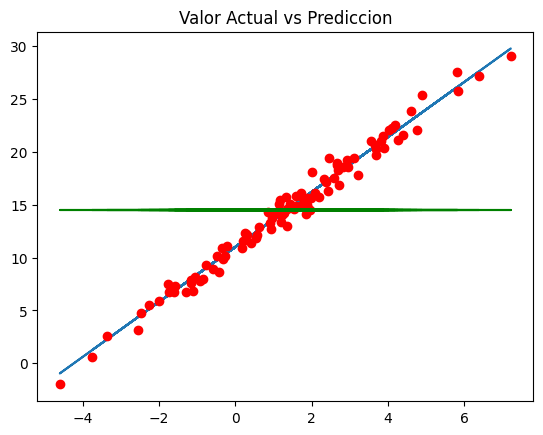

In [314]:
%matplotlib inline
plt.plot(data['x'], data['y_pred'])
plt.plot(data['x'], data['y'], "ro")
plt.plot(data['x'], y_mean_arr, 'g')
plt.title('Valor Actual vs Prediccion')

In [315]:
data ['SSR'] = (data['y_pred'] - np.mean (data['y']))**2
data ['SSD'] = (data ['y_pred']- data ['y'])**2
data ['SST'] = (data ['y']- np.mean(data ['y']))** 2

In [316]:
data.head()

,x,y,y_pred,SSR,SSD,SST
0,3.682023,20.258673,20.573261,36.810341,0.098965,33.092004
1,1.350583,12.971249,14.511517,0.000029,2.372426,2.355793
2,-0.423177,8.606830,9.899740,21.218628,1.671615,34.801476
3,1.778305,15.594711,15.623594,1.248775,0.000834,1.185056
4,2.672638,18.777873,17.948858,11.852531,0.687265,18.247977


In [317]:
SSR = sum (data['SSR'])
SSD = sum (data ['SSD'])
SST = sum (data['SST'])

In [318]:
SSR

3360.024687059707

In [319]:
SSD

63.68757718147423

In [320]:
SST

3503.4596816677627

In [321]:
SSR + SSD

3423.7122642411814

In [322]:
R2 = SSR/SST

In [323]:
R2

0.9590590423064964

(array([ 3.,  2.,  5., 11., 19., 18., 13., 14., 11.,  4.]),
 array([-2.07046498, -1.69372232, -1.31697967, -0.94023701, -0.56349436,
        -0.18675171,  0.18999095,  0.5667336 ,  0.94347626,  1.32021891,
         1.69696156]),
 <BarContainer object of 10 artists>)

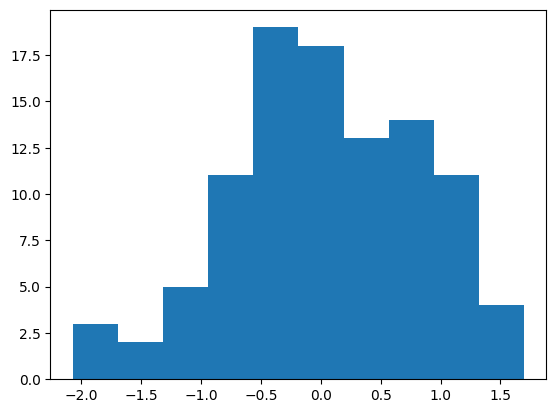

In [324]:
plt.hist((data ['y_pred']- data ['y']))

Ahora, vamos a utilizar la X para interntar predecir el valor actual, es decir, vamos a calcular la recta de regresión lineal. Para realizar esto, lo que vamos a tener en cuenta es las ecuaciones de la regresión lineal:

- $y = a + b*x$
- $b = \frac{\sum (x_i-\bar{x}) * (y_i-\bar{y})}{\sum (x_i-\bar{x})^2}$
- $ a = \bar{y} - b*\bar{x}$

In [325]:
x_mean = np.mean(data['x'])
y_mean = np.mean (data ['y'])

In [326]:
x_mean

1.3730941574964828

In [327]:
y_mean

14.506107973959047

In [328]:
data ['beta_n'] = (data['x'] - x_mean) * (data['y']- y_mean)
data ['beta_denominador'] = (data['x'] - x_mean)**2

In [329]:
beta = sum(data ['beta_n'])/ sum (data['beta_denominador'])

In [330]:
alpha = y_mean - beta * x_mean

In [331]:
alpha, beta

(10.893257576956678, 2.631174546390584)

In [332]:
data ['y_pred_2'] = alpha + beta * data ['x']

In [333]:
data.head()

,x,y,y_pred,SSR,SSD,SST,beta_n,beta_denominador,y_pred_2
0,3.682023,20.258673,20.573261,36.810341,0.098965,33.092004,13.282265,5.331154,20.581304
1,1.350583,12.971249,14.511517,0.000029,2.372426,2.355793,0.034551,0.000507,14.446878
2,-0.423177,8.606830,9.899740,21.218628,1.671615,34.801476,10.596702,3.226590,9.779805
3,1.778305,15.594711,15.623594,1.248775,0.000834,1.185056,0.441114,0.164196,15.572290
4,2.672638,18.777873,17.948858,11.852531,0.687265,18.247977,5.551345,1.688814,17.925434


In [334]:
SSR_model = sum((data['y_pred_2'] - y_mean)**2)
SSD_model = sum((data ['y_pred_2']- data ['y'])**2)
SST_model = sum((data ['y']- y_mean)** 2)

SSR, SSD, SST

(3360.024687059707, 63.68757718147423, 3503.4596816677627)

In [335]:
R2_model = SSR_model/SST_model
R2_model, R2

(0.9820760632786436, 0.9590590423064964)

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

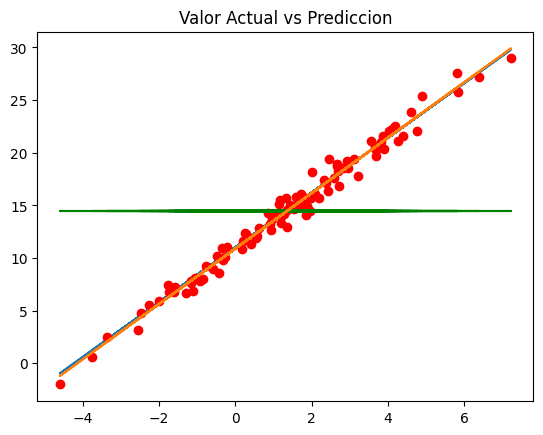

In [336]:
%matplotlib inline
plt.plot(data['x'], data['y_pred'])
plt.plot(data['x'], data['y'], "ro")
plt.plot(data['x'], y_mean_arr, 'g')
plt.plot(data['x'], data['y_pred_2'])
plt.title('Valor Actual vs Prediccion')

Ahora, vamos a ver un poco más en detalle la significatividad de los modelos. Para ello, vamos a tener que analizar el p_valor. Lo que tenemos que asegurar, que existe correlación entre X e Y ya que sino la hay, beta = 0. Por lo tanto, deberemos asegurar que tanto t-estadistico, como p_valor tienen que ser menor que el nivel de significación para rechazar la hipotesis nula y aceptar la alternativa.

Otro estadístico importante es el "estadístico F" que se deine como:

$F= \frac{\frac{SSR}{k}}{\frac{SSD}{n-k-1}}$ donde $k$ es el numero de variables predictoras del modelo

Y, por tanto, debemos asegurar que este valor F:

$ p_valor < P(F> F_{k, n-k-1})$

Y, finalmente, otro valor interesante es el valor estandard de los residuos

$RSE = \sqrt{\frac{SSD}{n-2}}$

En el caslo de una regresion múltiple:

$RSE = \sqrt{\frac{SSD}{n-k-1}}$

Ahora, tendo a nuestro ejemplo, podemos calcular el error estandar de los residuos de la siguiente forma:

In [337]:
RSE = np.sqrt(SSD/(len(data) -2))

In [338]:
RSE

0.8061471556394995

Esto es, existe un error de 0.80 sobre el valor medio de Y o lo que es lo mismo:

In [339]:
RSE/np.mean(data['y'])

0.055572946036708946

El error es del 5% aproximadamente